# Red Wine Quality: Part 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Q1 : Import red wine data set 

In [2]:
df = pd.read_csv('winequality-red.csv', sep=',')
pd.set_option('display.max_columns', None)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Description of Dataset

*source: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009*

### Input variables:

1. **fixed acidity**: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2. **volatile acidity**: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3. **citric acid**: found in small quantities, citric acid can add 'freshness' and flavor to wines

4. **residual sugar**: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5. **chlorides**: the amount of salt in the wine

6. **free sulfur dioxide**: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7. **total sulfur dioxide**: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8. **density**: the density of water is close to that of water depending on the percent alcohol and sugar content

9. **pH**: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10. **sulphates**: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11. **alcohol**: the percent alcohol content of the wine

### Output variable:
1. **quality**: score between 0 and 10

# Exploratory Data Analysis

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

>**No columns with null values**

## Histograms

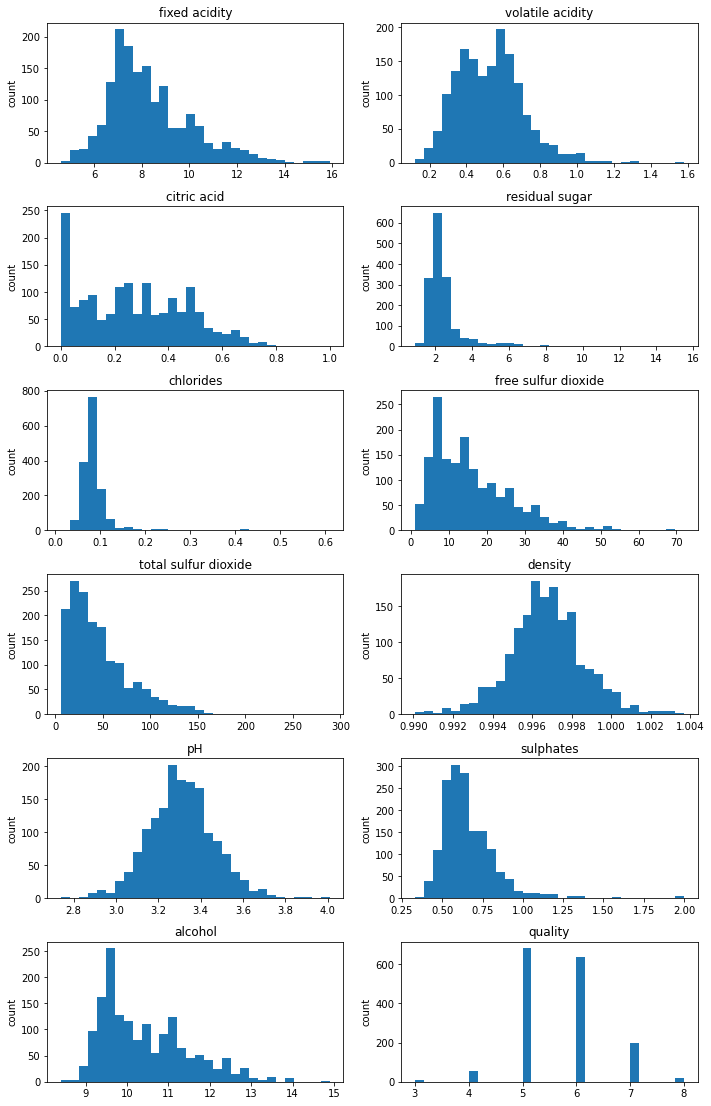

In [5]:
fig = plt.figure(figsize=(10, 17))
for i in range(df.shape[1]):
    plt.subplot(6, 2, i + 1)
    plt.hist(df[df.columns[i]], bins=30, label='no')        # Univariate Analysis
    plt.title(df.columns[i])
    plt.ylabel('count')
plt.tight_layout(rect=[0, 0.04, 1, 0.95])

>### Histogram Inferences
><ul>
    <li>Majority of wines have 2-3 grams/litre of residual sugar</li>
    <li>Majority of wines have around 0.1 grams of chloride salts</li>
    <li>Wines have a low concentration of free SO2, total SO2 and sulphates as the quantity decreases with increase in concentration</li>
    <li>Many input variables such as density, pH, etc. are normally distributed</li>
    <li>Majority of wines have a quality score 5-6</li>
</ul>

## Pearson correlation coefficient matrix

<h1> $\rho$ <sub>x, y</sub> = $\frac{cov(x, y)}{\sigma x \sigma y}$ </h1>

In [6]:
pCorr_mat = df.corr(method='pearson')   # find pearson correlation coeff for each pair (X, Y) variables and form a matrix
pCorr_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### Heatmap of Pearson correlation coefficient matrix

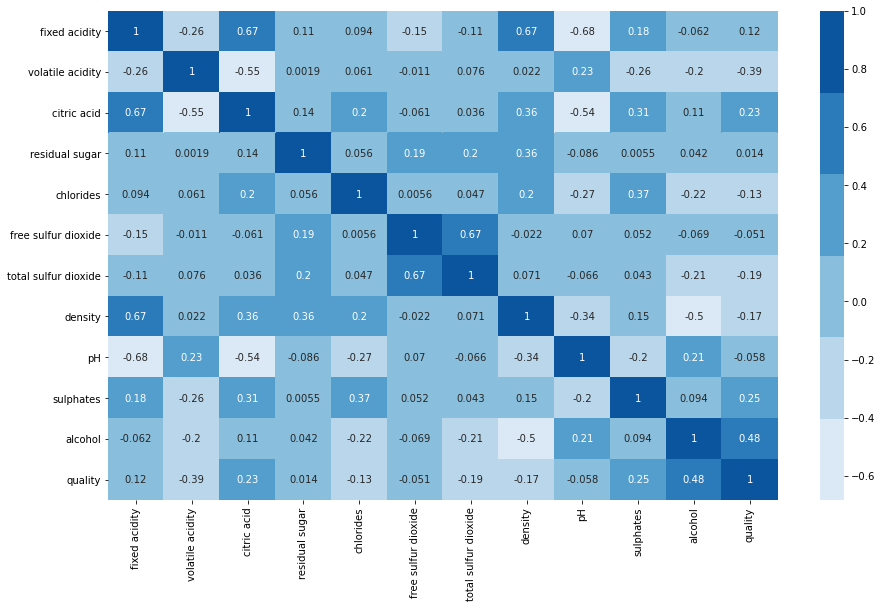

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15,9))
sns.heatmap(pCorr_mat, annot=True, cmap=sns.color_palette("Blues"), ax=ax)   # bivariate Analysis
plt.show()

>### Heatmap Inferences
><ul>
    <li>Fixed acidity and Citric acid have high positive correlation</li>
    <li>Fixed acidity and Density have high positive correlation</li>
    <li>Fixed acidity and pH have high negative correlation</li>
    <li>Free Sulphur Dioxide and Total Sulphur Dioxide have high positive correlation</li>
    <li>Alcohol variable is the most correlated variable in determining wine quality</li>
</ul>

## Feature Density Plots

>**Measurement of Central Tendancy**
><ol>
    <li>Mean</li>
    <li>Median</li>
    <li>Mode</li>
</ol>

>**Measurement of Spread of data**
><ol>
    <li>Range (Max - Min)</li>
    <li>Standard deviation from mean (mean +/- std)</li>
    <li>Interquartile Range (75th percentile - 25th percentile)</li>
</ol>

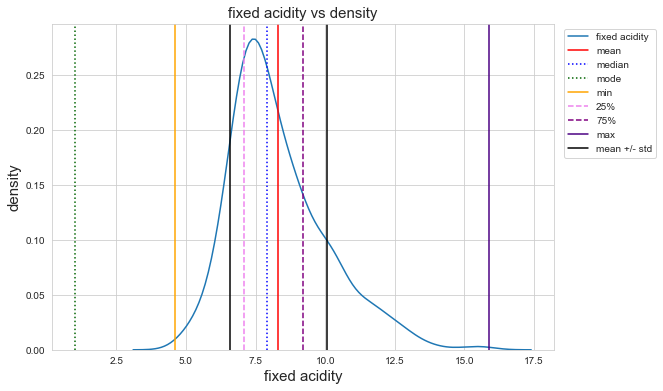

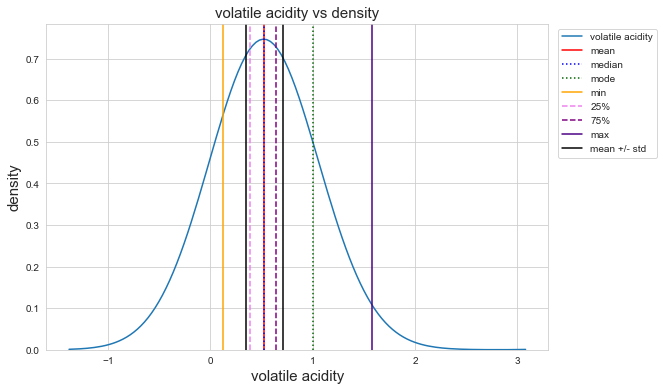

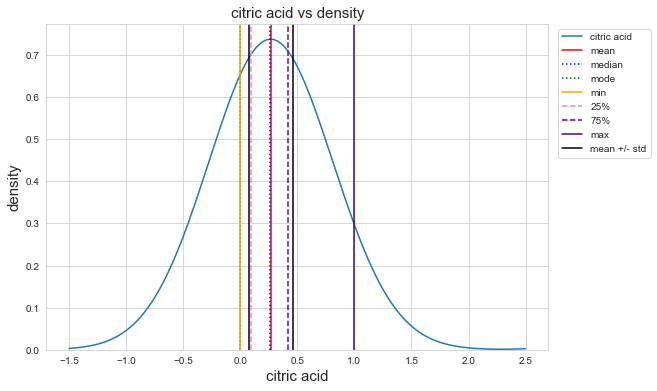

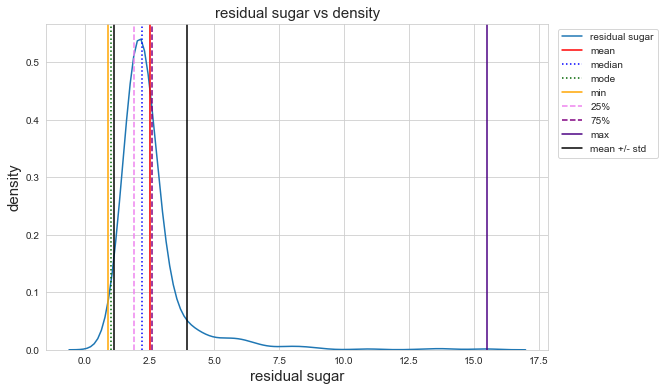

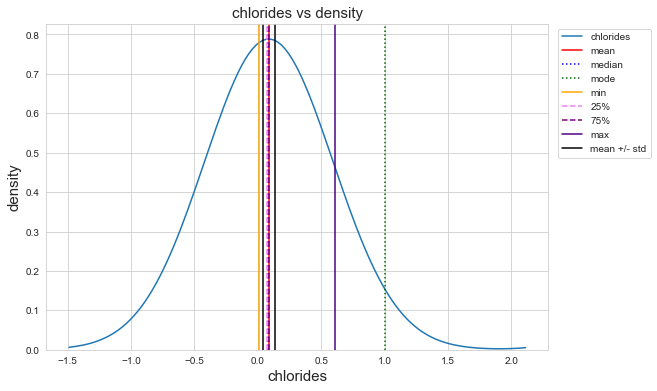

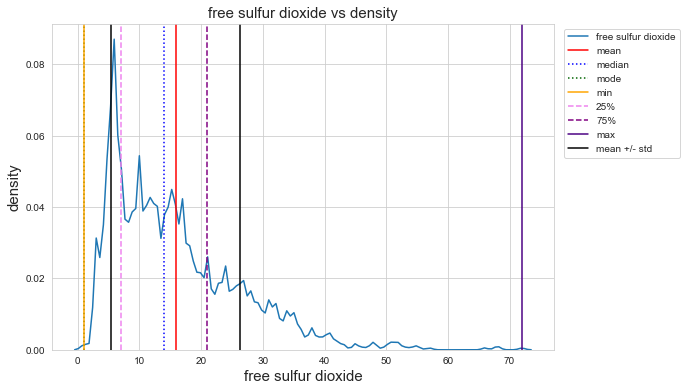

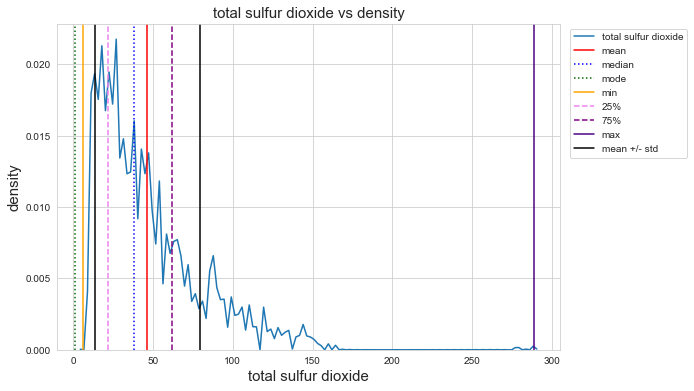

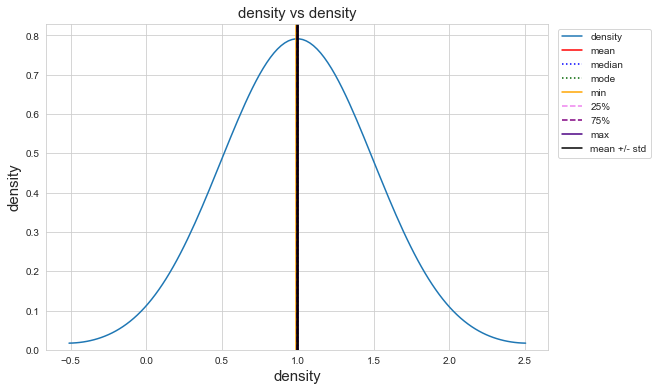

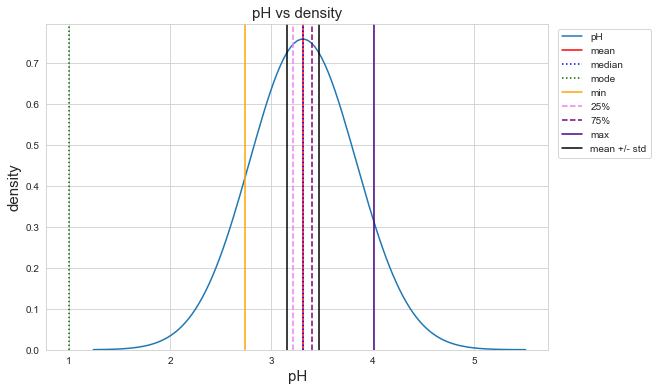

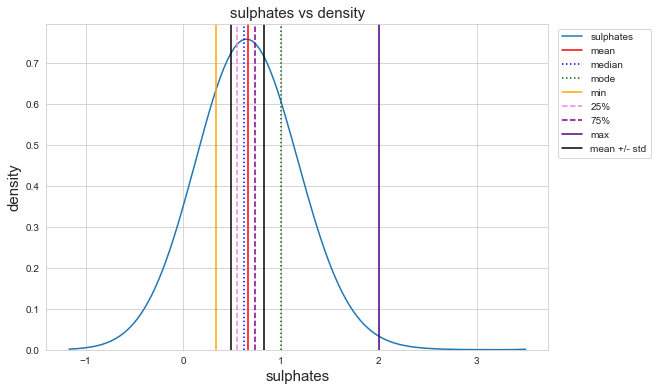

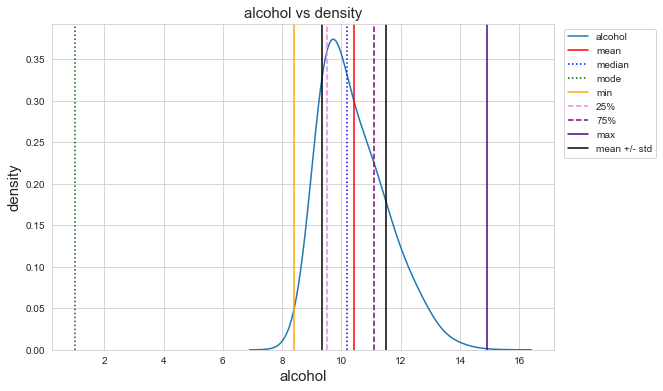

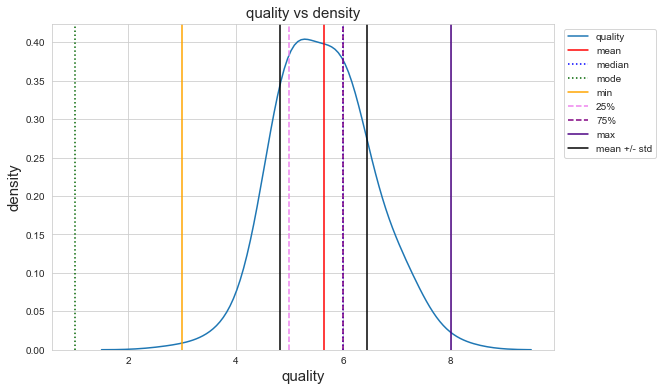

In [8]:
for i in range(df.shape[1]):
    
    fig = plt.figure(figsize=(9, 6))
    sns.set_style('whitegrid')
    sns.kdeplot(df[df.columns[i]], bw=0.5)                                                      # Univariate Analysis
    
    #Central Tendancy
    
    plt.axvline(df[df.columns[i]].mean(), color='red', linestyle='-', label='mean')                  # mean
    plt.axvline(df[df.columns[i]].median(), color='blue', linestyle=':', label='median')             # median
    plt.axvline(df[df.columns[i]].mode().any(), color='darkgreen', linestyle=':', label='mode')      # mode
    
    #Spread
    
    plt.axvline(df[df.columns[i]].min(), color='orange', linestyle='-', label='min')                 #min
    plt.axvline(df[df.columns[i]].describe()['25%'], color='violet', linestyle='--', label='25%')    # 25th percentile
    plt.axvline(df[df.columns[i]].describe()['75%'], color='purple', linestyle='--', label='75%')    # 75th percentile
    plt.axvline(df[df.columns[i]].max(), color='indigo', linestyle='-', label='max')                 # max
    
    mean = df[df.columns[i]].mean()
    plt.axvline(mean + df[df.columns[i]].std(), color='black', linestyle='-', label='mean +/- std')  # mean + std
    plt.axvline(mean - df[df.columns[i]].std(), color='black', linestyle='-')                        # mean - std
    
    plt.title(df.columns[i] + ' vs density', fontdict={'fontsize': 15, 'fontweight' : 2})
    plt.xlabel(df.columns[i], fontdict={'fontsize': 15, 'fontweight' : 2})
    plt.ylabel('density', fontdict={'fontsize': 15, 'fontweight' : 2})
    plt.legend(loc="upper left", bbox_to_anchor=(1.01,1))
    plt.show()

>**The spread of data and its central tendancy can be observed in the above density plots**

# Q2 : Data Preprocessing¶

## (1) Feature Selection

### 1.1 Ranking features using variance


In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


> X includes the **dependent variables** <br>
> y is the **'quality' (target variable)**

In [10]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [11]:
features = X.var().sort_values(ascending=True)              #sorting variance of each dependent variable
print(features)

density                    0.000004
chlorides                  0.002215
pH                         0.023835
sulphates                  0.028733
volatile acidity           0.032062
citric acid                0.037947
alcohol                    1.135647
residual sugar             1.987897
fixed acidity              3.031416
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
dtype: float64


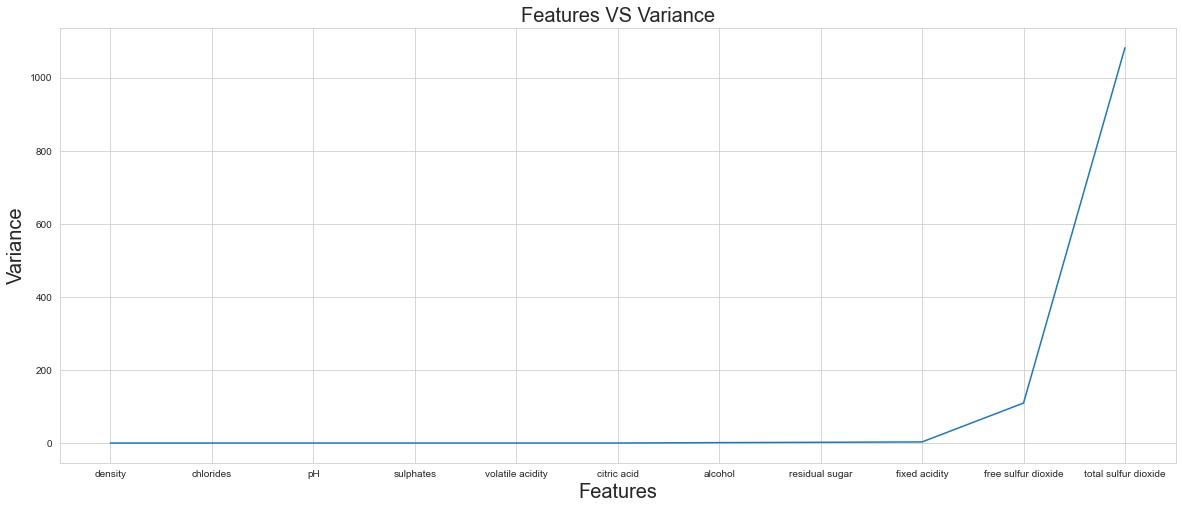

In [12]:
xaxis = [class_ for class_ in features.index]
yaxis = [variance for variance in features]
plt.figure(figsize=(20,8))
plt.plot(xaxis, yaxis) 
plt.xlabel('Features', fontsize=20)
plt.ylabel('Variance', fontsize=20)
plt.title('Features VS Variance', fontsize=20)
plt.show()

> There is a **significant** increase in variance after the top **6** features

In [13]:
n_features = 6                                             #Selecting top 6 features

selected_features_var = []
for feature in features.index:
    if len(selected_features_var) < n_features:
        selected_features_var.append(feature)

In [14]:
print(selected_features_var)

['density', 'chlorides', 'pH', 'sulphates', 'volatile acidity', 'citric acid']


### 1.2 Ranking features using Information Gain (IG)

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

> **mutual_info_classif** calculates Information Gain (IG) of the dependent variables w.r.t. the target variable

In [16]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [17]:
#Calculating IG of k='all' features
features = SelectKBest(score_func=mutual_info_classif, k='all') 
features.fit(X, y)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x0000023467DF5A60>)

In [18]:
f = [(features.scores_[i], df.columns[i]) for i in range(len(features.scores_))]    
f.sort(reverse=True)                                                                #reverse sort IG of each variable
f

[(0.17664619572834717, 'alcohol'),
 (0.11013438501511463, 'volatile acidity'),
 (0.10007170794897124, 'sulphates'),
 (0.09995778711954983, 'density'),
 (0.07718616559372515, 'total sulfur dioxide'),
 (0.06819957417699563, 'citric acid'),
 (0.04404160354858755, 'chlorides'),
 (0.04118744997949442, 'fixed acidity'),
 (0.026945789848156654, 'residual sugar'),
 (0.023965737110225316, 'pH'),
 (0.015091147654018311, 'free sulfur dioxide')]

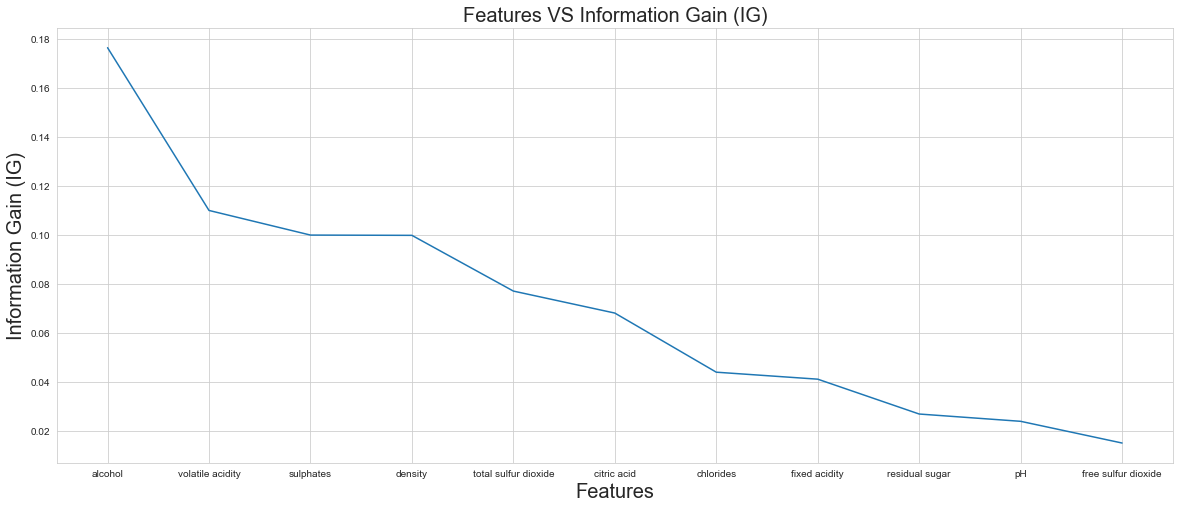

In [19]:
xaxis = [class_[1] for class_ in f]
yaxis = [class_[0] for class_ in f]
plt.figure(figsize=(20,8))
plt.plot(xaxis, yaxis)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Information Gain (IG)', fontsize=20)
plt.title('Features VS Information Gain (IG)', fontsize=20)
plt.show()

> Selecting top **5** features with **significant Information Gain (IG)**

In [20]:
n_features = 5                                                    #Selecting top 5 features

selected_features_ig = []
for feature in f:
    if len(selected_features_ig) < n_features:
        selected_features_ig.append(feature[1])

print(selected_features_ig)

['alcohol', 'volatile acidity', 'sulphates', 'density', 'total sulfur dioxide']


## (2) Feature Forward Method

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [22]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [23]:
#On splitting dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [24]:
def forward_feature_selection(X_train, y_train, X_test, y_test, n):
    selected_features = []
    selected_scores = []
    
    for _ in range(n):                                                  #select top n features
        scores = []
        model = RandomForestClassifier()                                #model used
        
        for feature in X_train.columns:
            if feature not in selected_features:
                temp = selected_features.copy()
                temp.append(feature)
                model.fit(X_train[temp], y_train)
                
                score = f1_score(y_test, model.predict(X_test[temp]), average='micro')
                scores.append((score, feature))                         #score on appending the particular feature

        scores.sort(key=lambda x : x[0], reverse = True)
        selected_scores.append(scores[0][0])                            #select feature with highest score
        selected_features.append(scores[0][1])

    return selected_features, selected_scores

In [25]:
n = 5                                     #Selecting top 5 features using FFS
selected_features_ffs, scores_ffs = forward_feature_selection(X_train, y_train, X_test, y_test, n)
selected_features_ffs

['alcohol', 'volatile acidity', 'fixed acidity', 'pH', 'total sulfur dioxide']

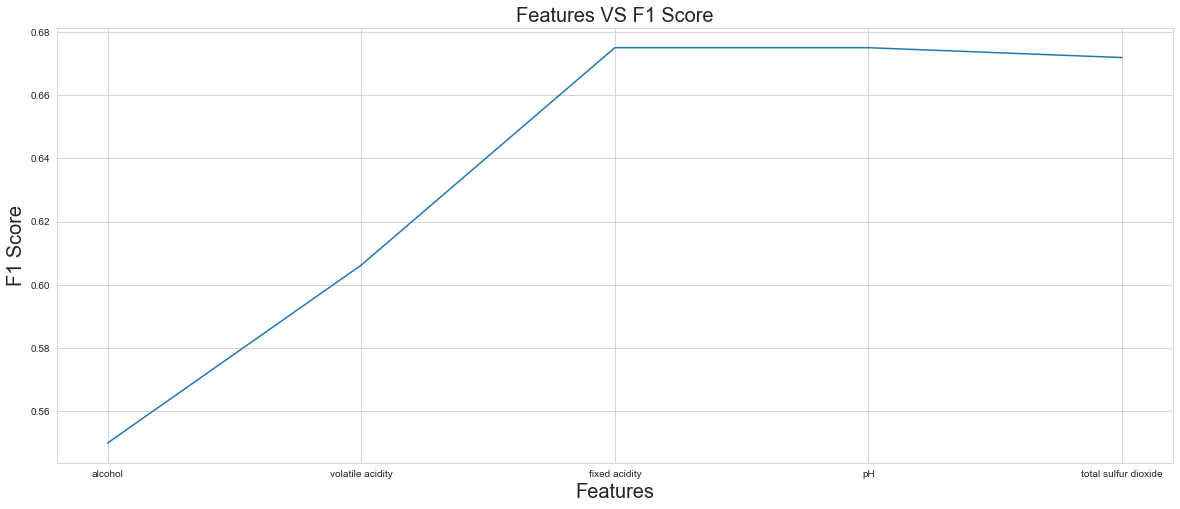

In [26]:
xaxis = [feature for feature in selected_features_ffs]
yaxis = [score for score in scores_ffs]
plt.figure(figsize=(20,8))
plt.plot(xaxis, yaxis)
plt.xlabel('Features', fontsize=20)
plt.ylabel('F1 Score', fontsize=20)
plt.title('Features VS F1 Score', fontsize=20)
plt.show()

> **Increase in F1 Score** can be observed as we select each feature

## (3) Feature Extraction using PCA

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [28]:
X = df.iloc[:, :-1]
X = StandardScaler().fit_transform(X)                            #z = (x-mu)/sigma --> Scales X accordingly
y = df.iloc[:,-1]

> ### On selecting n_components = 2 eigen vectors using PCA 

In [29]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

pca_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
quality = pd.DataFrame(data = y)

pca_df = pd.concat([pca_df, quality], axis = 1, ignore_index=True)
pca_df.columns = ['principal component 1', 'principal component 2', 'quality']

In [30]:
# This results in extracting 2 eigen vectors as shown below

In [31]:
pca_df.head()

,principal component 1,principal component 2,quality
0,-1.619530,0.450950,5
1,-0.799170,1.856553,5
2,-0.748479,0.882039,5
3,2.357673,-0.269976,6
4,-1.619530,0.450950,5


In [32]:
import matplotlib.colors as pltc
from matplotlib.lines import Line2D

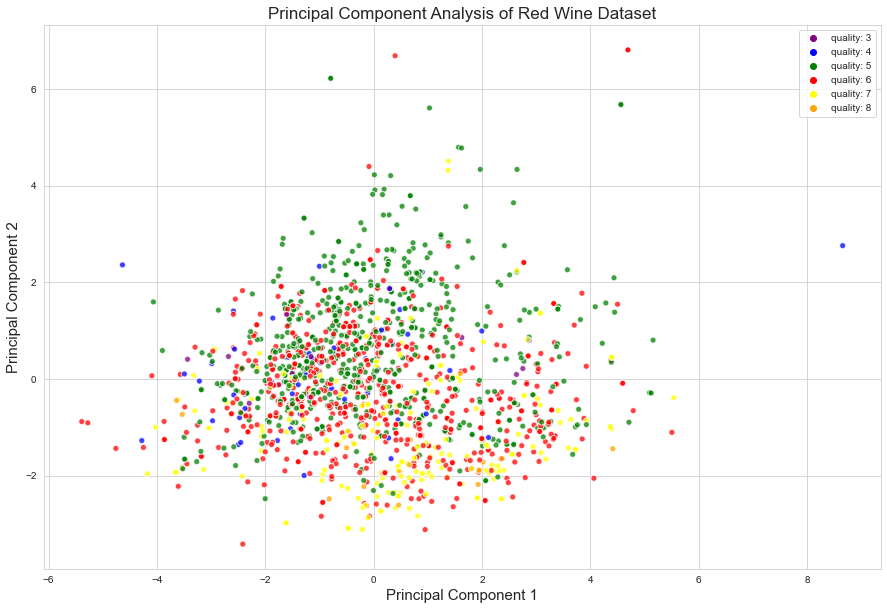

In [33]:
#On plotting the principal components w.r.t. to quality

colors = ['purple', 'blue', 'green', 'red', 'yellow', 'orange']
cmap = pltc.ListedColormap(colors)

plt.figure(figsize=(15,10))

plt.xlabel('Principal Component 1', fontdict={'fontsize': 15, 'fontweight' : 2})
plt.ylabel('Principal Component 2', fontdict={'fontsize': 15, 'fontweight' : 2})
plt.title('Principal Component Analysis of Red Wine Dataset', fontdict={'fontsize': 17, 'fontweight' : 2})

plt.scatter(x=pca_df['principal component 1'],
            y=pca_df['principal component 2'], 
            c=pca_df['quality'], 
            cmap=cmap,
            marker = 'o', 
            alpha=0.75, 
            edgecolors='white',
           )

lines = [Line2D([0], [0], color=c, marker='o', linestyle='') for c in colors]
labels = ['quality: 3', 'quality: 4', 'quality: 5', 'quality: 6', 'quality: 7', 'quality: 8']

plt.legend(lines, labels)
plt.show()

# Q3:  Perform Classification Using Machine Learning Classifiers

> **Importing the required libraries**

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

## 3.1: Without Feature Selection

In [35]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [36]:
#On splitting dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [37]:
#On resetting index
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [38]:
scaler = StandardScaler()    #z = (x-mu)/sigma --> Scales X accordingly                        

X_sc_train = scaler.fit_transform(X_train)
X_sc_test = scaler.fit_transform(X_test)

In [39]:
X_sc_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [40]:
X_sc_test

array([[-3.33991288e-01,  2.42581186e-01, -9.63136787e-01, ...,
        -4.42561113e-01,  6.34928030e-02, -7.55088351e-01],
       [-2.78643172e-01, -9.49230728e-02, -4.94583756e-01, ...,
         5.19964189e-01, -1.15964614e+00, -8.44713081e-01],
       [ 1.32645219e+00,  8.61338994e-01, -2.34276516e-01, ...,
        -1.85887699e-01,  2.23796204e+00, -4.86214161e-01],
       ...,
       [-1.90259149e-03,  4.67584025e-01, -7.80921719e-02, ...,
        -1.02007629e+00, -8.19885325e-01, -5.75838891e-01],
       [ 2.74837989e-01, -1.38868940e+00,  6.50768099e-01, ...,
        -1.02007629e+00,  2.67349294e-01,  6.78907330e-01],
       [ 4.40882337e-01,  1.39572074e+00, -1.17138258e+00, ...,
        -1.21719346e-01, -7.51933161e-01, -6.65463621e-01]])

### 3.1.1 Naive Bayes

> A **Gaussian Naive Bayes** algorithm is a special type of NB algorithm. It’s specifically used when the features have **continuous values**. It’s also assumed that all the features are following a **gaussian distribution i.e, normal distribution**.

In [41]:
nb = GaussianNB()                              #Calling the model
nb.fit(X_sc_train,y_train)                     #Fitting the model
nb_predict=nb.predict(X_sc_test)               #Predicting the model

In [42]:
#Evaluating using various metrics
nb_conf_matrix_1 = confusion_matrix(y_test, nb_predict)
nb_acc_score_1 = accuracy_score(y_test, nb_predict)
nb_precision_1 = precision_score(y_test, nb_predict, average = "micro")
nb_recall_1 = recall_score(y_test, nb_predict, average = "micro")
nb_f1_1 = f1_score(y_test, nb_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(nb_conf_matrix_1)
print('Precision: ', nb_precision_1)
print('Recall: ', nb_recall_1)
print('F1 Score: ', nb_f1_1)
print('Classification Accuracy: ', nb_acc_score_1)

########### Evaluation ###########
Confusion Matrix: 
[[ 0  0  1  0  0  0]
 [ 1  2  6  1  0  0]
 [ 0  3 90 34  3  0]
 [ 0  7 41 62 21  1]
 [ 0  0  2 21 19  0]
 [ 0  0  0  1  4  0]]
Precision:  0.540625
Recall:  0.540625
F1 Score:  0.540625
Classification Accuracy:  0.540625


### 3.1.2 Decision Tree

>  A **Decision tree** is a **flowchart like tree structure**, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

In [43]:
dt = DecisionTreeClassifier()                     #Calling the model
dt.fit(X_sc_train,y_train)                        #Fitting the model
dt_predict = dt.predict(X_sc_test)                #Predicting the model

In [44]:
#Evaluating using various metrics
dt_conf_matrix_1 = confusion_matrix(y_test, dt_predict)
dt_acc_score_1 = accuracy_score(y_test, dt_predict)
dt_precision_1 = precision_score(y_test, dt_predict, average = "micro")
dt_recall_1 = recall_score(y_test, dt_predict, average = "micro")
dt_f1_1 = f1_score(y_test, dt_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(dt_conf_matrix_1)
print('Precision: ', dt_precision_1)
print('Recall: ', dt_recall_1)
print('F1 Score: ', dt_f1_1)
print('Classification Accuracy: ', dt_acc_score_1)

########### Evaluation ###########
Confusion Matrix: 
[[ 0  0  0  1  0  0]
 [ 0  1  4  5  0  0]
 [ 1  4 92 29  4  0]
 [ 0  2 40 69 21  0]
 [ 0  1  1 19 19  2]
 [ 0  0  1  2  2  0]]
Precision:  0.565625
Recall:  0.565625
F1 Score:  0.565625
Classification Accuracy:  0.565625


### 3.1.3 Random Forest

> A **random forest** is a meta estimator that fits **a number of decision tree classifiers** on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [45]:
rf = RandomForestClassifier()                       #Calling the model
rf.fit(X_sc_train, y_train)                         #Fitting the model
rf_predict=rf.predict(X_sc_test)                    #Predicting the model

In [46]:
#Evaluating using various metrics
rf_conf_matrix_1 = confusion_matrix(y_test, rf_predict)
rf_acc_score_1 = accuracy_score(y_test, rf_predict)
rf_precision_1 = precision_score(y_test, rf_predict, average = "micro")
rf_recall_1 = recall_score(y_test, rf_predict, average = "micro")
rf_f1_1 = f1_score(y_test, rf_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(rf_conf_matrix_1)
print('Precision: ', rf_precision_1)
print('Recall: ', rf_recall_1)
print('F1 Score: ', rf_f1_1)
print('Classification Accuracy: ', rf_acc_score_1)

########### Evaluation ###########
Confusion Matrix: 
[[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 99 30  1  0]
 [ 0  0 41 84  6  1]
 [ 0  0  0 26 15  1]
 [ 0  0  0  1  4  0]]
Precision:  0.61875
Recall:  0.61875
F1 Score:  0.61875
Classification Accuracy:  0.61875


### 3.1.4 Support Vector Machine

> The **SVM** algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the **kernel trick**. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. Kernel trick helps you to build a more accurate classifier.

In [47]:
svc = SVC()                                          #Calling the model
svc.fit(X_sc_train, y_train)                         #Fitting the model
svm_predict = svc.predict(X_sc_test)                 #Predicting the model

In [48]:
#Evaluating using various metrics
svm_conf_matrix_1 = confusion_matrix(y_test, svm_predict)
svm_acc_score_1 = accuracy_score(y_test, svm_predict)
svm_precision_1 = precision_score(y_test, svm_predict, average = "micro")
svm_recall_1 = recall_score(y_test, svm_predict, average = "micro")
svm_f1_1 = f1_score(y_test, svm_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(svm_conf_matrix_1)
print('Precision: ', svm_precision_1)
print('Recall: ', svm_recall_1)
print('F1 Score: ', svm_f1_1)
print('Classification Accuracy: ', svm_acc_score_1)

########### Evaluation ###########
Confusion Matrix: 
[[ 0  0  1  0  0  0]
 [ 0  0  8  2  0  0]
 [ 0  0 97 33  0  0]
 [ 0  0 43 85  4  0]
 [ 0  0  0 33  9  0]
 [ 0  0  0  2  3  0]]
Precision:  0.596875
Recall:  0.596875
F1 Score:  0.596875
Classification Accuracy:  0.596875


## 3.2: With Ranking features using variance 

In [49]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [50]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


These below are the selected features using variance

In [51]:
selected_features_var

['density', 'chlorides', 'pH', 'sulphates', 'volatile acidity', 'citric acid']

In [52]:
X = X[selected_features_var]

In [53]:
X.head()

,density,chlorides,pH,sulphates,volatile acidity,citric acid
0,0.9978,0.076,3.51,0.56,0.70,0.00
1,0.9968,0.098,3.20,0.68,0.88,0.00
2,0.9970,0.092,3.26,0.65,0.76,0.04
3,0.9980,0.075,3.16,0.58,0.28,0.56
4,0.9978,0.076,3.51,0.56,0.70,0.00


In [54]:
#On splitting dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [55]:
#On resetting index
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [56]:
#On resetting index
scaler = StandardScaler()                                 

X_sc_train = scaler.fit_transform(X_train)
X_sc_test = scaler.fit_transform(X_test)

### 3.2.1 Naive Bayes

> A **Gaussian Naive Bayes** algorithm is a special type of NB algorithm. It’s specifically used when the features have **continuous values**. It’s also assumed that all the features are following a **gaussian distribution i.e, normal distribution**.

In [57]:
nb = GaussianNB()                     #Calling the model
nb.fit(X_sc_train,y_train)            #Fitting the model
nb_predict=nb.predict(X_sc_test)      #Predicting the model

In [58]:
#Evaluating using various metrics
nb_conf_matrix_2 = confusion_matrix(y_test, nb_predict)
nb_acc_score_2 = accuracy_score(y_test, nb_predict)
nb_precision_2 = precision_score(y_test, nb_predict, average = "micro")
nb_recall_2 = recall_score(y_test, nb_predict, average = "micro")
nb_f1_2 = f1_score(y_test, nb_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(nb_conf_matrix_2)
print('Precision: ', nb_precision_2)
print('Recall: ', nb_recall_2)
print('F1 Score: ', nb_f1_2)
print('Classification Accuracy: ', nb_acc_score_2)

########### Evaluation ###########
Confusion Matrix: 
[[ 0  0  1  0  0  0]
 [ 1  1  8  0  0  0]
 [ 0  3 70 55  2  0]
 [ 0  4 43 66 19  0]
 [ 0  0  2 20 20  0]
 [ 0  0  0  4  1  0]]
Precision:  0.490625
Recall:  0.490625
F1 Score:  0.490625
Classification Accuracy:  0.490625


### 3.2.2 Decision Tree

>  A **Decision tree** is a **flowchart like tree structure**, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

In [59]:
dt = DecisionTreeClassifier()           #Calling the model
dt.fit(X_sc_train,y_train)              #Fitting the model
dt_predict = dt.predict(X_sc_test)      #Predicting the model

In [60]:
#Evaluating using various metrics
dt_conf_matrix_2 = confusion_matrix(y_test, dt_predict)
dt_acc_score_2 = accuracy_score(y_test, dt_predict)
dt_precision_2 = precision_score(y_test, dt_predict, average = "micro")
dt_recall_2 = recall_score(y_test, dt_predict, average = "micro")
dt_f1_2 = f1_score(y_test, dt_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(dt_conf_matrix_2)
print('Precision: ', dt_precision_2)
print('Recall: ', dt_recall_2)
print('F1 Score: ', dt_f1_2)
print('Classification Accuracy: ', dt_acc_score_2)

########### Evaluation ###########
Confusion Matrix: 
[[ 0  0  1  0  0  0]
 [ 0  1  5  3  1  0]
 [ 1  6 79 35  9  0]
 [ 2  5 44 63 17  1]
 [ 0  1  4 18 17  2]
 [ 0  0  0  2  3  0]]
Precision:  0.5
Recall:  0.5
F1 Score:  0.5
Classification Accuracy:  0.5


### 3.2.3 Random Forest

> A **random forest** is a meta estimator that fits **a number of decision tree classifiers** on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [61]:
rf = RandomForestClassifier()           #Calling the model
rf.fit(X_sc_train, y_train)             #Fitting the model
rf_predict=rf.predict(X_sc_test)        #Predicting the model

In [62]:
#Evaluating using various metrics
rf_conf_matrix_2 = confusion_matrix(y_test, rf_predict)
rf_acc_score_2 = accuracy_score(y_test, rf_predict)
rf_precision_2 = precision_score(y_test, rf_predict, average = "micro")
rf_recall_2 = recall_score(y_test, rf_predict, average = "micro")
rf_f1_2 = f1_score(y_test, rf_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(rf_conf_matrix_2)
print('Precision: ', rf_precision_2)
print('Recall: ', rf_recall_2)
print('F1 Score: ', rf_f1_2)
print('Classification Accuracy: ', rf_acc_score_2)

########### Evaluation ###########
Confusion Matrix: 
[[  0   0   0   1   0   0]
 [  0   0   6   4   0   0]
 [  0   0 101  28   1   0]
 [  0   0  44  76  12   0]
 [  0   0   2  23  16   1]
 [  0   0   0   1   4   0]]
Precision:  0.603125
Recall:  0.603125
F1 Score:  0.603125
Classification Accuracy:  0.603125


### 3.2.4 Support Vector Machine

> The **SVM** algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the **kernel trick**. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. Kernel trick helps you to build a more accurate classifier.

In [63]:
svc = SVC()                            #Calling the model
svc.fit(X_sc_train, y_train)           #Fitting the model
svm_predict = svc.predict(X_sc_test)   #Predicting the model

In [64]:
#Evaluating using various metrics
svm_conf_matrix_2 = confusion_matrix(y_test, svm_predict)
svm_acc_score_2 = accuracy_score(y_test, svm_predict)
svm_precision_2 = precision_score(y_test, svm_predict, average = "micro")
svm_recall_2 = recall_score(y_test, svm_predict, average = "micro")
svm_f1_2 = f1_score(y_test, svm_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(svm_conf_matrix_2)
print('Precision: ', svm_precision_2)
print('Recall: ', svm_recall_2)
print('F1 Score: ', svm_f1_2)
print('Classification Accuracy: ', svm_acc_score_2)

########### Evaluation ###########
Confusion Matrix: 
[[ 0  0  0  1  0  0]
 [ 0  0  9  1  0  0]
 [ 0  0 95 35  0  0]
 [ 0  0 49 77  6  0]
 [ 0  0  3 31  8  0]
 [ 0  0  0  3  2  0]]
Precision:  0.5625
Recall:  0.5625
F1 Score:  0.5625
Classification Accuracy:  0.5625


## 3.3: With Ranking features using Information Gain (IG) 

In [65]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [66]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


These are the selected features using Information Gain(IG)

In [67]:
selected_features_ig

['alcohol', 'volatile acidity', 'sulphates', 'density', 'total sulfur dioxide']

In [68]:
X = X[selected_features_ig]

In [69]:
X.head()

,alcohol,volatile acidity,sulphates,density,total sulfur dioxide
0,9.4,0.70,0.56,0.9978,34.0
1,9.8,0.88,0.68,0.9968,67.0
2,9.8,0.76,0.65,0.9970,54.0
3,9.8,0.28,0.58,0.9980,60.0
4,9.4,0.70,0.56,0.9978,34.0


In [70]:
#On splitting dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [71]:
#On resetting index
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [72]:
#z = (x-mu)/sigma --> Scales X accordingly
scaler = StandardScaler()                                 
X_sc_train = scaler.fit_transform(X_train)
X_sc_test = scaler.fit_transform(X_test)

### 3.3.1 Naive Bayes

> A **Gaussian Naive Bayes** algorithm is a special type of NB algorithm. It’s specifically used when the features have **continuous values**. It’s also assumed that all the features are following a **gaussian distribution i.e, normal distribution**.

In [73]:
nb = GaussianNB()                       #Calling the model
nb.fit(X_sc_train,y_train)              #Fitting the model
nb_predict=nb.predict(X_sc_test)        #Predicting the model

In [74]:
#Evaluating using various metrics
nb_conf_matrix_3 = confusion_matrix(y_test, nb_predict)
nb_acc_score_3 = accuracy_score(y_test, nb_predict)
nb_precision_3 = precision_score(y_test, nb_predict, average = "micro")
nb_recall_3 = recall_score(y_test, nb_predict, average = "micro")
nb_f1_3 = f1_score(y_test, nb_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(nb_conf_matrix_3)
print('Precision: ', nb_precision_3)
print('Recall: ', nb_recall_3)
print('F1 Score: ', nb_f1_3)
print('Classification Accuracy: ', nb_acc_score_3)

########### Evaluation ###########
Confusion Matrix: 
[[  0   0   1   0   0   0]
 [  1   1   8   0   0   0]
 [  0   1 100  29   0   0]
 [  0   1  49  67  15   0]
 [  0   0   2  31   9   0]
 [  0   0   0   1   4   0]]
Precision:  0.553125
Recall:  0.553125
F1 Score:  0.553125
Classification Accuracy:  0.553125


### 3.3.2 Decision Tree

>  A **Decision tree** is a **flowchart like tree structure**, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

In [75]:
dt = DecisionTreeClassifier()           #Calling the model
dt.fit(X_sc_train,y_train)              #Fitting the model
dt_predict = dt.predict(X_sc_test)      #Predicting the model

In [76]:
#Evaluating using various metrics
dt_conf_matrix_3 = confusion_matrix(y_test, dt_predict)
dt_acc_score_3 = accuracy_score(y_test, dt_predict)
dt_precision_3 = precision_score(y_test, dt_predict, average = "micro")
dt_recall_3 = recall_score(y_test, dt_predict, average = "micro")
dt_f1_3 = f1_score(y_test, dt_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(dt_conf_matrix_3)
print('Precision: ', dt_precision_3)
print('Recall: ', dt_recall_3)
print('F1 Score: ', dt_f1_3)
print('Classification Accuracy: ', dt_acc_score_3)

########### Evaluation ###########
Confusion Matrix: 
[[ 0  0  0  1  0  0]
 [ 0  2  4  4  0  0]
 [ 0  3 87 34  6  0]
 [ 1  5 37 72 16  1]
 [ 0  2  2 17 20  1]
 [ 0  0  0  1  3  1]]
Precision:  0.56875
Recall:  0.56875
F1 Score:  0.56875
Classification Accuracy:  0.56875


###  3.3.3 Random Forest

> A **random forest** is a meta estimator that fits **a number of decision tree classifiers** on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [77]:
rf = RandomForestClassifier()                #Calling the model
rf.fit(X_sc_train, y_train)                  #Fitting the model
rf_predict=rf.predict(X_sc_test)             #Predicting the model

In [78]:
#Evaluating using various metrics
rf_conf_matrix_3 = confusion_matrix(y_test, rf_predict)
rf_acc_score_3 = accuracy_score(y_test, rf_predict)
rf_precision_3 = precision_score(y_test, rf_predict, average = "micro")
rf_recall_3 = recall_score(y_test, rf_predict, average = "micro")
rf_f1_3 = f1_score(y_test, rf_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(rf_conf_matrix_3)
print('Precision: ', rf_precision_3)
print('Recall: ', rf_recall_3)
print('F1 Score: ', rf_f1_3)
print('Classification Accuracy: ', rf_acc_score_3)

########### Evaluation ###########
Confusion Matrix: 
[[  0   0   1   0   0   0]
 [  0   0   6   4   0   0]
 [  0   0 106  24   0   0]
 [  0   0  42  79  11   0]
 [  0   0   1  20  21   0]
 [  0   0   0   1   4   0]]
Precision:  0.64375
Recall:  0.64375
F1 Score:  0.64375
Classification Accuracy:  0.64375


### 3.3.4 Support Vector Machine

> The **SVM** algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the **kernel trick**. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. Kernel trick helps you to build a more accurate classifier.

In [79]:
svc = SVC()                               #Calling the model
svc.fit(X_sc_train, y_train)              #Fitting the model
svm_predict = svc.predict(X_sc_test)      #Predicting the model

In [80]:
#Evaluating using various metrics
svm_conf_matrix_3 = confusion_matrix(y_test, svm_predict)
svm_acc_score_3 = accuracy_score(y_test, svm_predict)
svm_precision_3 = precision_score(y_test, svm_predict, average = "micro")
svm_recall_3 = recall_score(y_test, svm_predict, average = "micro")
svm_f1_3 = f1_score(y_test, svm_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(svm_conf_matrix_3)
print('Precision: ', svm_precision_3)
print('Recall: ', svm_recall_3)
print('F1 Score: ', svm_f1_3)
print('Classification Accuracy: ', svm_acc_score_3)

########### Evaluation ###########
Confusion Matrix: 
[[ 0  0  1  0  0  0]
 [ 0  0  9  1  0  0]
 [ 0  0 99 31  0  0]
 [ 0  0 52 75  5  0]
 [ 0  0  1 34  7  0]
 [ 0  0  0  1  4  0]]
Precision:  0.565625
Recall:  0.565625
F1 Score:  0.565625
Classification Accuracy:  0.565625


# 4: With Feature Forward Method 

In [81]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [82]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


These are the features selected using Feature Forward Method

In [83]:
selected_features_ffs

['alcohol', 'volatile acidity', 'fixed acidity', 'pH', 'total sulfur dioxide']

In [84]:
X = X[selected_features_ffs]

In [85]:
X.head()

,alcohol,volatile acidity,fixed acidity,pH,total sulfur dioxide
0,9.4,0.70,7.4,3.51,34.0
1,9.8,0.88,7.8,3.20,67.0
2,9.8,0.76,7.8,3.26,54.0
3,9.8,0.28,11.2,3.16,60.0
4,9.4,0.70,7.4,3.51,34.0


In [86]:
#On splitting dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [87]:
#On resetting index
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [88]:
#z = (x-mu)/sigma --> Scales X accordingly
scaler = StandardScaler()                                 
X_sc_train = scaler.fit_transform(X_train)
X_sc_test = scaler.fit_transform(X_test)

### 3.4.1 Naive Bayes 

> A **Gaussian Naive Bayes** algorithm is a special type of NB algorithm. It’s specifically used when the features have **continuous values**. It’s also assumed that all the features are following a **gaussian distribution i.e, normal distribution**.

In [89]:
nb = GaussianNB()                   #Calling the model
nb.fit(X_sc_train,y_train)          #Fitting the model
nb_predict=nb.predict(X_sc_test)    #Predicting the model

In [90]:
#Evaluating using various metrics
nb_conf_matrix_4 = confusion_matrix(y_test, nb_predict)
nb_acc_score_4 = accuracy_score(y_test, nb_predict)
nb_precision_4 = precision_score(y_test, nb_predict, average = "micro")
nb_recall_4 = recall_score(y_test, nb_predict, average = "micro")
nb_f1_4 = f1_score(y_test, nb_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(nb_conf_matrix_4)
print('Precision: ', nb_precision_4)
print('Recall: ', nb_recall_4)
print('F1 Score: ', nb_f1_4)
print('Classification Accuracy: ', nb_acc_score_4)

########### Evaluation ###########
Confusion Matrix: 
[[ 0  0  1  0  0  0]
 [ 1  2  6  1  0  0]
 [ 0  0 97 30  3  0]
 [ 0  2 49 69 12  0]
 [ 0  0  1 32  9  0]
 [ 0  0  0  1  4  0]]
Precision:  0.553125
Recall:  0.553125
F1 Score:  0.553125
Classification Accuracy:  0.553125


### 3.4.2 Decision Tree

>  A **Decision tree** is a **flowchart like tree structure**, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label

In [91]:
dt = DecisionTreeClassifier()      #Calling the model
dt.fit(X_sc_train,y_train)         #Fitting the model
dt_predict = dt.predict(X_sc_test) #Predicting the model

In [92]:
#Evaluating using various metrics
dt_conf_matrix_4 = confusion_matrix(y_test, dt_predict)
dt_acc_score_4 = accuracy_score(y_test, dt_predict)
dt_precision_4 = precision_score(y_test, dt_predict, average = "micro")
dt_recall_4 = recall_score(y_test, dt_predict, average = "micro")
dt_f1_4 = f1_score(y_test, dt_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(dt_conf_matrix_4)
print('Precision: ', dt_precision_4)
print('Recall: ', dt_recall_4)
print('F1 Score: ', dt_f1_4)
print('Classification Accuracy: ', dt_acc_score_4)

########### Evaluation ###########
Confusion Matrix: 
[[ 1  0  0  0  0  0]
 [ 1  2  5  2  0  0]
 [ 1  4 90 30  5  0]
 [ 0  3 35 74 18  2]
 [ 0  1  7 12 20  2]
 [ 0  1  1  2  1  0]]
Precision:  0.584375
Recall:  0.584375
F1 Score:  0.584375
Classification Accuracy:  0.584375


### 3.4.3 Random Forest

> A **random forest** is a meta estimator that fits **a number of decision tree classifiers** on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [93]:
rf = RandomForestClassifier()       #Calling the model
rf.fit(X_sc_train, y_train)         #Fitting the model
rf_predict=rf.predict(X_sc_test)    #Predicting the model

In [94]:
#Evaluating using various metrics
rf_conf_matrix_4 = confusion_matrix(y_test, rf_predict)
rf_acc_score_4 = accuracy_score(y_test, rf_predict)
rf_precision_4 = precision_score(y_test, rf_predict, average = "micro")
rf_recall_4 = recall_score(y_test, rf_predict, average = "micro")
rf_f1_4 = f1_score(y_test, rf_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(rf_conf_matrix_4)
print('Precision: ', rf_precision_4)
print('Recall: ', rf_recall_4)
print('F1 Score: ', rf_f1_4)
print('Classification Accuracy: ', rf_acc_score_4)

########### Evaluation ###########
Confusion Matrix: 
[[  0   0   1   0   0   0]
 [  0   1   8   1   0   0]
 [  0   0 104  25   1   0]
 [  0   0  36  81  15   0]
 [  0   0   0  21  20   1]
 [  0   0   0   2   3   0]]
Precision:  0.64375
Recall:  0.64375
F1 Score:  0.64375
Classification Accuracy:  0.64375


### 3.4.4 Support Vector Machine

> The **SVM** algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the **kernel trick**. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. Kernel trick helps you to build a more accurate classifier.

In [95]:
svc = SVC()                               #Calling the model
svc.fit(X_sc_train, y_train)              #Fitting the model
svm_predict = svc.predict(X_sc_test)      #Predicting the model

In [96]:
#Evaluating using various metrics
svm_conf_matrix_4 = confusion_matrix(y_test, svm_predict)
svm_acc_score_4 = accuracy_score(y_test, svm_predict)
svm_precision_4 = precision_score(y_test, svm_predict, average = "micro")
svm_recall_4 = recall_score(y_test, svm_predict, average = "micro")
svm_f1_4 = f1_score(y_test, svm_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(svm_conf_matrix_4)
print('Precision: ', svm_precision_4)
print('Recall: ', svm_recall_4)
print('F1 Score: ', svm_f1_4)
print('Classification Accuracy: ', svm_acc_score_4)

########### Evaluation ###########
Confusion Matrix: 
[[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 99 30  1  0]
 [ 0  0 52 71  9  0]
 [ 0  0  0 33  9  0]
 [ 0  0  0  3  2  0]]
Precision:  0.559375
Recall:  0.559375
F1 Score:  0.559375
Classification Accuracy:  0.559375


# 3.5: Feature Extraction using PCA on Entire Dataset

In [97]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [98]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Features Extracted using PCA on Entire Dataset

In [99]:
pca_df.head()

,principal component 1,principal component 2,quality
0,-1.619530,0.450950,5
1,-0.799170,1.856553,5
2,-0.748479,0.882039,5
3,2.357673,-0.269976,6
4,-1.619530,0.450950,5


In [100]:
X = pca_df.drop('quality', axis=1)
y = pca_df['quality']

In [101]:
#On splitting dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [102]:
#On resetting index
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

### 3.5.1 Naive Bayes

> A **Gaussian Naive Bayes** algorithm is a special type of NB algorithm. It’s specifically used when the features have **continuous values**. It’s also assumed that all the features are following a **gaussian distribution i.e, normal distribution**.

In [103]:
nb = GaussianNB()                 #Calling the model
nb.fit(X_train,y_train)           #Fitting the model
nb_predict=nb.predict(X_test)     #Predicting the model

In [104]:
#Evaluating using various metrics
nb_conf_matrix_5 = confusion_matrix(y_test, nb_predict)
nb_acc_score_5 = accuracy_score(y_test, nb_predict)
nb_precision_5 = precision_score(y_test, nb_predict, average = "micro")
nb_recall_5 = recall_score(y_test, nb_predict, average = "micro")
nb_f1_5 = f1_score(y_test, nb_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(nb_conf_matrix_5)
print('Precision: ', nb_precision_5)
print('Recall: ', nb_recall_5)
print('F1 Score: ', nb_f1_5)
print('Classification Accuracy: ', nb_acc_score_5)

########### Evaluation ###########
Confusion Matrix: 
[[ 0  0  0  1  0  0]
 [ 0  0  3  7  0  0]
 [ 0  0 74 56  0  0]
 [ 0  0 42 86  4  0]
 [ 0  0  3 38  1  0]
 [ 0  0  0  5  0  0]]
Precision:  0.503125
Recall:  0.503125
F1 Score:  0.503125
Classification Accuracy:  0.503125


### 3.5.2 Decision Tree

>  A **Decision tree** is a **flowchart like tree structure**, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

In [105]:
dt = DecisionTreeClassifier()     #Calling the model
dt.fit(X_train,y_train)           #Fitting the model
dt_predict = dt.predict(X_test)   #Predicting the model

In [106]:
#Evaluating using various metrics
dt_conf_matrix_5 = confusion_matrix(y_test, dt_predict)
dt_acc_score_5 = accuracy_score(y_test, dt_predict)
dt_precision_5 = precision_score(y_test, dt_predict, average = "micro")
dt_recall_5 = recall_score(y_test, dt_predict, average = "micro")
dt_f1_5 = f1_score(y_test, dt_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(dt_conf_matrix_5)
print('Precision: ', dt_precision_5)
print('Recall: ', dt_recall_5)
print('F1 Score: ', dt_f1_5)
print('Classification Accuracy: ', dt_acc_score_5)

########### Evaluation ###########
Confusion Matrix: 
[[ 0  0  0  1  0  0]
 [ 0  0  4  4  2  0]
 [ 3  4 81 31 10  1]
 [ 4  4 44 64 16  0]
 [ 0  0  4 18 20  0]
 [ 0  0  1  2  2  0]]
Precision:  0.515625
Recall:  0.515625
F1 Score:  0.515625
Classification Accuracy:  0.515625


### 3.5.3 Random Forest

> A **random forest** is a meta estimator that fits **a number of decision tree classifiers** on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [107]:
rf = RandomForestClassifier()     #Calling the model
rf.fit(X_train, y_train)          #Fitting the model
rf_predict=rf.predict(X_test)     #Predicting the model

In [108]:
#Evaluating using various metrics
rf_conf_matrix_5 = confusion_matrix(y_test, rf_predict)
rf_acc_score_5 = accuracy_score(y_test, rf_predict)
rf_precision_5 = precision_score(y_test, rf_predict, average = "micro")
rf_recall_5 = recall_score(y_test, rf_predict, average = "micro")
rf_f1_5 = f1_score(y_test, rf_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(rf_conf_matrix_5)
print('Precision: ', rf_precision_5)
print('Recall: ', rf_recall_5)
print('F1 Score: ', rf_f1_5)
print('Classification Accuracy: ', rf_acc_score_5)

########### Evaluation ###########
Confusion Matrix: 
[[ 0  0  0  1  0  0]
 [ 0  0  5  5  0  0]
 [ 0  0 83 36 10  1]
 [ 0  1 46 72 13  0]
 [ 0  0  7 15 19  1]
 [ 0  0  1  3  1  0]]
Precision:  0.54375
Recall:  0.54375
F1 Score:  0.54375
Classification Accuracy:  0.54375


### 3.5.4 Support Vector Machine

> The **SVM** algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the **kernel trick**. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. Kernel trick helps you to build a more accurate classifier.

In [109]:
svc = SVC()                         #Calling the model
svc.fit(X_train, y_train)           #Fitting the model
svm_predict = svc.predict(X_test)   #Predicting the model

In [110]:
#Evaluating using various metrics
svm_conf_matrix_5 = confusion_matrix(y_test, svm_predict)
svm_acc_score_5 = accuracy_score(y_test, svm_predict)
svm_precision_5 = precision_score(y_test, svm_predict, average = "micro")
svm_recall_5 = recall_score(y_test, svm_predict, average = "micro")
svm_f1_5 = f1_score(y_test, svm_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(svm_conf_matrix_5)
print('Precision: ', svm_precision_5)
print('Recall: ', svm_recall_5)
print('F1 Score: ', svm_f1_5)
print('Classification Accuracy: ', svm_acc_score_5)

########### Evaluation ###########
Confusion Matrix: 
[[ 0  0  0  1  0  0]
 [ 0  0  5  5  0  0]
 [ 0  0 88 42  0  0]
 [ 0  0 60 66  6  0]
 [ 0  0  6 30  6  0]
 [ 0  0  0  4  1  0]]
Precision:  0.5
Recall:  0.5
F1 Score:  0.5
Classification Accuracy:  0.5


# 3.6: Feature Extraction using PCA on Feature Forward Method used Dataset

In [111]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [112]:
selected_features_ffs

['alcohol', 'volatile acidity', 'fixed acidity', 'pH', 'total sulfur dioxide']

In [113]:
X = X[selected_features_ffs]
X.head()

,alcohol,volatile acidity,fixed acidity,pH,total sulfur dioxide
0,9.4,0.70,7.4,3.51,34.0
1,9.8,0.88,7.8,3.20,67.0
2,9.8,0.76,7.8,3.26,54.0
3,9.8,0.28,11.2,3.16,60.0
4,9.4,0.70,7.4,3.51,34.0


In [114]:
X = StandardScaler().fit_transform(X)

In [115]:
pca = PCA(n_components=3)

In [116]:
principalComponents = pca.fit_transform(X)

In [117]:
principalComponents

array([[ 1.41199549,  0.64934854, -0.94831086],
       [ 0.39056313,  1.72953646, -0.73968098],
       [ 0.38818077,  1.15357028, -0.65821073],
       ...,
       [ 1.23779009, -0.6218917 ,  0.28041875],
       [ 2.21662771,  0.12030386, -0.17634655],
       [ 0.82485925, -1.02872646,  0.97296946]])

In [118]:
pca_df_fs = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])
quality = pd.DataFrame(data = y)

pca_df_fs = pd.concat([pca_df_fs, quality], axis = 1, ignore_index=True)
pca_df_fs.columns = ['principal component 1', 'principal component 2','principal component 3', 'quality']

Features Extracted using PCA on Feature Forward Method used Dataset

In [119]:
pca_df_fs.head()

,principal component 1,principal component 2,principal component 3,quality
0,1.411995,0.649349,-0.948311,5
1,0.390563,1.729536,-0.739681,5
2,0.388181,1.153570,-0.658211,5
3,-2.268936,0.170172,0.599540,6
4,1.411995,0.649349,-0.948311,5


In [120]:
X = pca_df_fs.drop('quality', axis=1)
y = pca_df_fs['quality']

In [121]:
X.head()

,principal component 1,principal component 2,principal component 3
0,1.411995,0.649349,-0.948311
1,0.390563,1.729536,-0.739681
2,0.388181,1.153570,-0.658211
3,-2.268936,0.170172,0.599540
4,1.411995,0.649349,-0.948311


In [122]:
#On splitting dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [123]:
#On resetting index
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

### 3.6.1 Naive Bayes

> A **Gaussian Naive Bayes** algorithm is a special type of NB algorithm. It’s specifically used when the features have **continuous values**. It’s also assumed that all the features are following a **gaussian distribution i.e, normal distribution**.

In [124]:
nb = GaussianNB()               #Calling the model
nb.fit(X_train,y_train)         #Fitting the model
nb_predict=nb.predict(X_test)   #Predicting the model

In [125]:
#Evaluating using various metrics
nb_conf_matrix_6 = confusion_matrix(y_test, nb_predict)
nb_acc_score_6 = accuracy_score(y_test, nb_predict)
nb_precision_6 = precision_score(y_test, nb_predict, average = "micro")
nb_recall_6 = recall_score(y_test, nb_predict, average = "micro")
nb_f1_6 = f1_score(y_test, nb_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(nb_conf_matrix_6)
print('Precision: ', nb_precision_6)
print('Recall: ', nb_recall_6)
print('F1 Score: ', nb_f1_6)
print('Classification Accuracy: ', nb_acc_score_6)

########### Evaluation ###########
Confusion Matrix: 
[[ 0  0  1  0  0  0]
 [ 0  0  9  1  0  0]
 [ 0  0 88 41  1  0]
 [ 0  0 41 79 12  0]
 [ 0  0  2 33  7  0]
 [ 0  0  0  3  2  0]]
Precision:  0.54375
Recall:  0.54375
F1 Score:  0.54375
Classification Accuracy:  0.54375


### 3.6.2 Decision Tree

>  A **Decision tree** is a **flowchart like tree structure**, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

In [126]:
dt = DecisionTreeClassifier()    #Calling the model
dt.fit(X_train,y_train)          #Fitting the model
dt_predict = dt.predict(X_test)  #Predicting the model

In [127]:
#Evaluating using various metrics
dt_conf_matrix_6 = confusion_matrix(y_test, dt_predict)
dt_acc_score_6 = accuracy_score(y_test, dt_predict)
dt_precision_6 = precision_score(y_test, dt_predict, average = "micro")
dt_recall_6 = recall_score(y_test, dt_predict, average = "micro")
dt_f1_6 = f1_score(y_test, dt_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(dt_conf_matrix_6)
print('Precision: ', dt_precision_6)
print('Recall: ', dt_recall_6)
print('F1 Score: ', dt_f1_6)
print('Classification Accuracy: ', dt_acc_score_6)

########### Evaluation ###########
Confusion Matrix: 
[[ 0  0  0  1  0  0]
 [ 2  0  4  3  1  0]
 [ 2  5 93 22  8  0]
 [ 1  6 32 74 18  1]
 [ 0  1  4 13 24  0]
 [ 0  0  0  3  2  0]]
Precision:  0.596875
Recall:  0.596875
F1 Score:  0.596875
Classification Accuracy:  0.596875


### 3.6.3 Random Forest

> A **random forest** is a meta estimator that fits **a number of decision tree classifiers** on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [128]:
rf = RandomForestClassifier()    #Calling the model
rf.fit(X_train, y_train)         #Fitting the model
rf_predict=rf.predict(X_test)    #Predicting the model

In [129]:
#Evaluating using various metrics
rf_conf_matrix_6 = confusion_matrix(y_test, rf_predict)
rf_acc_score_6 = accuracy_score(y_test, rf_predict)
rf_precision_6 = precision_score(y_test, rf_predict, average = "micro")
rf_recall_6 = recall_score(y_test, rf_predict, average = "micro")
rf_f1_6 = f1_score(y_test, rf_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(rf_conf_matrix_6)
print('Precision: ', rf_precision_6)
print('Recall: ', rf_recall_6)
print('F1 Score: ', rf_f1_6)
print('Classification Accuracy: ', rf_acc_score_6)

########### Evaluation ###########
Confusion Matrix: 
[[  0   0   0   1   0   0]
 [  1   1   6   2   0   0]
 [  1   0 101  26   2   0]
 [  1   0  29  94   8   0]
 [  0   0   2  19  21   0]
 [  0   0   0   2   3   0]]
Precision:  0.678125
Recall:  0.678125
F1 Score:  0.678125
Classification Accuracy:  0.678125


### 3.6.4 Support Vector Machine

> The **SVM** algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the **kernel trick**. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. Kernel trick helps you to build a more accurate classifier.

In [130]:
svc = SVC()                           #Calling the model
svc.fit(X_train, y_train)             #Fitting the model
svm_predict = svc.predict(X_test)     #Predicting the model

In [131]:
#Evaluating using various metrics
svm_conf_matrix_6 = confusion_matrix(y_test, svm_predict)
svm_acc_score_6 = accuracy_score(y_test, svm_predict)
svm_precision_6 = precision_score(y_test, svm_predict, average = "micro")
svm_recall_6 = recall_score(y_test, svm_predict, average = "micro")
svm_f1_6 = f1_score(y_test, svm_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(svm_conf_matrix_6)
print('Precision: ', svm_precision_6)
print('Recall: ', svm_recall_6)
print('F1 Score: ', svm_f1_6)
print('Classification Accuracy: ', svm_acc_score_6)

########### Evaluation ###########
Confusion Matrix: 
[[ 0  0  1  0  0  0]
 [ 0  0  8  2  0  0]
 [ 0  0 88 42  0  0]
 [ 0  0 38 89  5  0]
 [ 0  0  0 34  8  0]
 [ 0  0  0  4  1  0]]
Precision:  0.578125
Recall:  0.578125
F1 Score:  0.578125
Classification Accuracy:  0.578125


# 3.7: With Mapping

>Next we shall create a new column called **Review**. This column will contain the values of 1, 2 and 3. 
>
><ul>
    <li>1 &rarr; <b>Bad</b></li>
    <li>2 &rarr; <b>Average</b></li>
    <li>3 &rarr; <b>Excellent</b></li>
 </ul>
>
>This will be split in the following way: 
>
>
><ul>
    <li>(1,2,3) &rarr; <b>Bad</b></li>
    <li>(4,5,6,7) &rarr; <b>Average</b></li>
    <li>(8,9,10) &rarr; <b>Excellent</b></li>
 </ul>

In [132]:
#Create an empty list called Reviews
reviews = []
for i in df['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
df['Reviews'] = reviews

In [133]:
X = df.iloc[:,:11]
y = df['Reviews']

In [134]:
#On splitting dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [135]:
#On resetting index
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [136]:
#z = (x-mu)/sigma --> Scales X accordingly
scaler = StandardScaler()                                

X_sc_train = scaler.fit_transform(X_train)
X_sc_test = scaler.fit_transform(X_test)

### 3.7.1 Naive Bayes

> A **Gaussian Naive Bayes** algorithm is a special type of NB algorithm. It’s specifically used when the features have **continuous values**. It’s also assumed that all the features are following a **gaussian distribution i.e, normal distribution**.

In [137]:
nb = GaussianNB()                    #Calling the model
nb.fit(X_sc_train,y_train)           #Fitting the model
nb_predict=nb.predict(X_sc_test)     #Predicting the model

In [138]:
#Evaluating using various metrics
nb_conf_matrix_7 = confusion_matrix(y_test, nb_predict)
nb_acc_score_7 = accuracy_score(y_test, nb_predict)
nb_precision_7 = precision_score(y_test, nb_predict, average = "micro")
nb_recall_7 = recall_score(y_test, nb_predict, average = "micro")
nb_f1_7 = f1_score(y_test, nb_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(nb_conf_matrix_7)
print('Precision: ', nb_precision_7)
print('Recall: ', nb_recall_7)
print('F1 Score: ', nb_f1_7)
print('Classification Accuracy: ', nb_acc_score_7)

########### Evaluation ###########
Confusion Matrix: 
[[  0   1   0]
 [  5 304   5]
 [  0   4   1]]
Precision:  0.953125
Recall:  0.953125
F1 Score:  0.953125
Classification Accuracy:  0.953125


### 3.7.2 Decision Tree

>  A **Decision tree** is a **flowchart like tree structure**, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

In [139]:
dt = DecisionTreeClassifier()        #Calling the model
dt.fit(X_sc_train,y_train)           #Fitting the model
dt_predict = dt.predict(X_sc_test)   #Predicting the model

In [140]:
#Evaluating using various metrics
dt_conf_matrix_7 = confusion_matrix(y_test, dt_predict)
dt_acc_score_7 = accuracy_score(y_test, dt_predict)
dt_precision_7 = precision_score(y_test, dt_predict, average = "micro")
dt_recall_7 = recall_score(y_test, dt_predict, average = "micro")
dt_f1_7 = f1_score(y_test, dt_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(dt_conf_matrix_7)
print('Precision: ', dt_precision_7)
print('Recall: ', dt_recall_7)
print('F1 Score: ', dt_f1_7)
print('Classification Accuracy: ', dt_acc_score_7)

########### Evaluation ###########
Confusion Matrix: 
[[  0   1   0]
 [  3 303   8]
 [  0   4   1]]
Precision:  0.95
Recall:  0.95
F1 Score:  0.9500000000000001
Classification Accuracy:  0.95


### 3.7.3 Random Forest

> A **random forest** is a meta estimator that fits **a number of decision tree classifiers** on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [141]:
rf = RandomForestClassifier()                      #Calling the model
rf.fit(X_sc_train, y_train)                        #Fitting the model
rf_predict=rf.predict(X_sc_test)                   #Predicting the model

In [142]:
#Evaluating using various metrics
rf_conf_matrix_7 = confusion_matrix(y_test, rf_predict)
rf_acc_score_7 = accuracy_score(y_test, rf_predict)
rf_precision_7 = precision_score(y_test, rf_predict, average = "micro")
rf_recall_7 = recall_score(y_test, rf_predict, average = "micro")
rf_f1_7 = f1_score(y_test, rf_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(rf_conf_matrix_7)
print('Precision: ', rf_precision_7)
print('Recall: ', rf_recall_7)
print('F1 Score: ', rf_f1_7)
print('Classification Accuracy: ', rf_acc_score_7)

########### Evaluation ###########
Confusion Matrix: 
[[  0   1   0]
 [  0 313   1]
 [  0   5   0]]
Precision:  0.978125
Recall:  0.978125
F1 Score:  0.978125
Classification Accuracy:  0.978125


### 7.4 Support Vector Machine

> The **SVM** algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the **kernel trick**. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. Kernel trick helps you to build a more accurate classifier.

In [143]:
svc = SVC()                                         #Calling the model
svc.fit(X_sc_train, y_train)                        #Fitting the mode
svm_predict = svc.predict(X_sc_test)                #Predicting the model

In [144]:
#Evaluating using various metrics
svm_conf_matrix_7 = confusion_matrix(y_test, svm_predict)
svm_acc_score_7 = accuracy_score(y_test, svm_predict)
svm_precision_7 = precision_score(y_test, svm_predict, average = "micro")
svm_recall_7 = recall_score(y_test, svm_predict, average = "micro")
svm_f1_7 = f1_score(y_test, svm_predict, average = "micro")

print('########### Evaluation ###########')
print('Confusion Matrix: ')
print(svm_conf_matrix_7)
print('Precision: ', svm_precision_7)
print('Recall: ', svm_recall_7)
print('F1 Score: ', svm_f1_7)
print('Classification Accuracy: ', svm_acc_score_7)

########### Evaluation ###########
Confusion Matrix: 
[[  0   1   0]
 [  0 314   0]
 [  0   5   0]]
Precision:  0.98125
Recall:  0.98125
F1 Score:  0.98125
Classification Accuracy:  0.98125


## Tablular Comparison

In [145]:
#Code for generating the table

model_types = ['Naive Bayes', 'Decision Tree', 'Random Forest', 'SVM']
feature_types = ['for all features', 
                 'for Ranked Features Selection (Variance)', 
                 'for Ranked Features Selection (IG)', 
                 'for Feature Forward Selection', 
                 'for PCA on all features', 
                 'for PCA on Selected Features (FFS)', 
                 'for Mapping Method']

model = pd.DataFrame(columns = ['Model'])
for feature in feature_types:                                                  #Dataframe of various models used
    for modelName in model_types:
        string = modelName + ' ' + feature
        model = model.append({'Model' : string}, ignore_index = True)

In [146]:
model_types = ['nb', 'dt', 'rf', 'svm']
metrics = ['_precision_', '_recall_', '_f1_', '_acc_score_']
columns = ['Precision', 'Recall', 'F1 Score', 'Classification Accuracy']

table = pd.DataFrame(columns = ['Precision', 'Recall', 'F1 Score', 'Classification Accuracy'])
for i in range(7):
    for modelName in model_types:
        data = {}
        for (metric, column) in zip(metrics, columns):                        #Adding the metric values to the specific column
            data[column] = eval(modelName + metric + str(i+1))
        table = table.append(data, ignore_index = True)

In [147]:
table = pd.concat([model, table], axis = 1, ignore_index=True)                # Merging the 2 Dataframes
table.columns = ['Model', 'Precision', 'Recall', 'F1 Score', 'Classification Accuracy']

In [148]:
table

,Model,Precision,Recall,F1 Score,Classification Accuracy
0,Naive Bayes for all features,0.540625,0.540625,0.540625,0.540625
1,Decision Tree for all features,0.565625,0.565625,0.565625,0.565625
2,Random Forest for all features,0.618750,0.618750,0.618750,0.618750
3,SVM for all features,0.596875,0.596875,0.596875,0.596875
4,Naive Bayes for Ranked Features Selection (Var...,0.490625,0.490625,0.490625,0.490625
5,Decision Tree for Ranked Features Selection (V...,0.500000,0.500000,0.500000,0.500000
6,Random Forest for Ranked Features Selection (V...,0.603125,0.603125,0.603125,0.603125
7,SVM for Ranked Features Selection (Variance),0.562500,0.562500,0.562500,0.562500
8,Naive Bayes for Ranked Features Selection (IG),0.553125,0.553125,0.553125,0.553125
9,Decision Tree for Ranked Features Selection (IG),0.568750,0.568750,0.568750,0.568750


> ## Observation:
> It is observed that **Random Forest Classifier** has a better score in almost every case<br>